# Proyecto 5

Para comenzar importamos las librerias a utilizar

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions as F
import scipy.stats as stats


## Carga datos clientes

In [6]:
df = pd.read_csv('df_final_demo.txt') 

Observamos los datos

In [7]:
df.head()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


### Analizamos los datos

In [8]:
F.explorar_df(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 4.8+ MB
None
Primeras filas
   client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  num_accts  \
0     836976             6.0              73.0      60.5     U        2.0   
1    2304905             7.0              94.0      58.0     U        2.0   
2    1439522             5.0              64.0      32.0     U

Analizamos los nulos

In [9]:
nulos=F.ver_nulos(df)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Limpieza de datos

Eliminaremos las columnas que no aportan información relevante para el análisis, ya que solo tienen valores nulos y el nombre del cliente

In [10]:

#Eliminamos nulos sin información solo el cliente

df3=df.dropna(subset=['clnt_tenure_yr','clnt_tenure_mnth','gendr','num_accts','bal','calls_6_mnth','logons_6_mnth'])


In [11]:
df3

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


Reemplazamos el nulo de la edad con la media ??? o lo anulamos??

In [12]:
F.ver_nulos(df3)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
9583,4666211,8.0,106.0,NaN,F,2.0,42550.55,4.0,7.0


In [13]:
valor=df3['clnt_age'].mean()
df4=F.completar_nulos(df3,'clnt_age',valor)

c:\Users\tachi\Documents\git\ensayo\Proyecto largo\functions.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(valor)


In [14]:
F.ver_nulos(df4)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth


Haremos la limpieza de datos final

In [15]:
df_clean = F.limpiar_dataset(df4)
df_clean

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


## Responda las siguientes preguntas sobre demografía:

¿Quiénes son los principales clientes que utilizan este proceso en línea?
¿Los clientes principales son más jóvenes o mayores, nuevos o antiguos?
A continuación, realice un análisis del comportamiento del cliente para responder cualquier pregunta adicional relevante que considere importante

Veamos como se comporta la variable edad

In [16]:
F.categorico(df_clean, 'clnt_age')

clnt_age
58.50000    859
55.50000    830
29.50000    829
28.50000    827
57.50000    826
           ... 
14.00000      2
95.50000      1
94.50000      1
46.44224      1
13.50000      1
Name: count, Length: 166, dtype: int64
[60.5        58.         32.         49.         33.         30.5
 58.5        57.5        67.5        54.5        34.5        51.5
 62.5        36.         74.         32.5        31.         25.5
 42.5        42.         30.         55.         38.         68.5
 52.5        54.         63.         48.         66.5        68.
 65.         51.         46.         63.5        23.         26.5
 56.5        76.5        27.5        39.5        25.         27.
 60.         66.         39.         56.         40.         52.
 31.5        43.5        35.         19.         64.5        64.
 22.5        33.5        36.5        61.         40.5        72.
 44.5        28.5        59.5        45.         18.         78.
 50.5        29.         37.5        57.         70.    

Construimos la tabla de frecuencias por grupos de edades agregando una nueva columna con los rangos de edad

In [17]:
def rango_edad(df,col):
    """Crea rangos de edad a partir de una columna numérica."""
    df4=df.copy()
    bins = [0, 18, 35, 50, 65, 120]
    labels = ['Niños(0-18)', 'Jóvenes(19-35)', 'Adultos(36-50)', 'Adultos maduros(51-65)', 'Adultos mayores(66+)']
    
    df4['age_group'] = pd.cut(df[col], bins=bins, labels=labels)
    
    return df4

In [18]:
F.categorico(df_clean,"client_id")

client_id
836976     1
2304905    1
1439522    1
1562045    1
5126305    1
          ..
7993686    1
8981690    1
333913     1
1573142    1
5602139    1
Name: count, Length: 70595, dtype: int64
[ 836976 2304905 1439522 ...  333913 1573142 5602139]
70595


In [19]:
df_clean1=rango_edad(df_clean,'clnt_age')

In [20]:
df_clean1

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,age_group
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Adultos maduros(51-65)
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Adultos maduros(51-65)
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Jóvenes(19-35)
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Adultos(36-50)
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Jóvenes(19-35)
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,Adultos(36-50)
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,Jóvenes(19-35)
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,Adultos maduros(51-65)
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,Adultos mayores(66+)


### Visualización del dataset

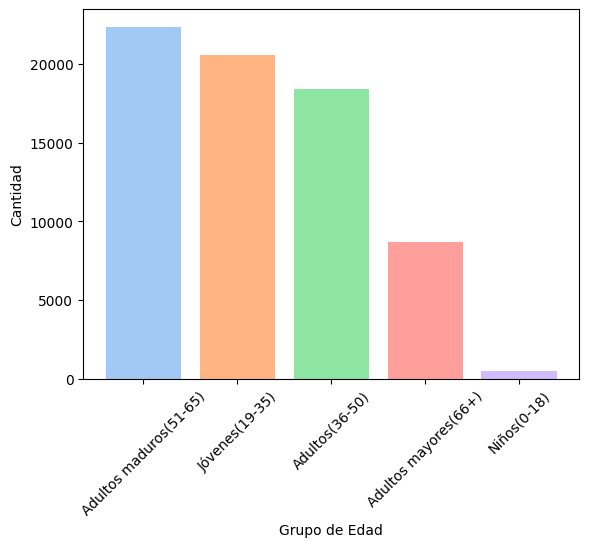

In [21]:
counts = df_clean1['age_group'].value_counts()

plt.bar(counts.index, counts.values, color=sns.color_palette('pastel'))

plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)

plt.show()


array([[<Axes: title={'center': 'client_id'}>,
        <Axes: title={'center': 'clnt_tenure_yr'}>,
        <Axes: title={'center': 'clnt_tenure_mnth'}>],
       [<Axes: title={'center': 'clnt_age'}>,
        <Axes: title={'center': 'num_accts'}>,
        <Axes: title={'center': 'bal'}>],
       [<Axes: title={'center': 'calls_6_mnth'}>,
        <Axes: title={'center': 'logons_6_mnth'}>, <Axes: >]],
      dtype=object)

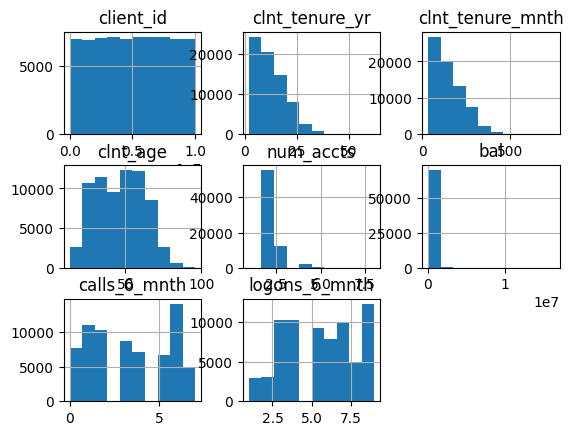

In [22]:
df_clean.hist()

## Carga datos Huellas digitales

In [23]:
df_huellas1 = pd.read_csv('df_final_web_data_pt_1.txt') 

Observamos la estructura del dataset

In [24]:
df_huellas1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


Analizamos los datos

In [25]:
F.explorar_df(df_huellas1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343141 entries, 0 to 343140
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     343141 non-null  int64 
 1   visitor_id    343141 non-null  object
 2   visit_id      343141 non-null  object
 3   process_step  343141 non-null  object
 4   date_time     343141 non-null  object
dtypes: int64(1), object(4)
memory usage: 13.1+ MB
None
Primeras filas
   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   

             date_time  
0  201

No tenemos nulos pero si duplicados. Veamos los duplicados:

In [26]:
duplicados=F.ver_duplicados(df_huellas1)

,client_id,visitor_id,visit_id,process_step,date_time
365,9358626,148475529_63668223960,223297395_36250329195_832161,start,2017-04-28 12:27:28
368,5376894,622509328_44408201172,688984457_43441834354_912755,start,2017-04-28 14:20:01
383,438567,923318467_50708963627,330543236_29863358529_771432,start,2017-04-28 02:52:29
785,1423857,716830992_81930238382,568819166_80596727019_75889,confirm,2017-04-10 22:44:58
1816,372523,730241475_25771921122,25331354_74479847014_854987,start,2017-04-27 10:51:26
...,...,...,...,...,...
342621,1853345,831456815_77348510380,596026060_87178689141_910423,step_3,2017-04-13 19:39:24
342677,1251269,791822615_78146852845,763845944_55757914723_70888,start,2017-04-28 10:20:33
342679,1251269,791822615_78146852845,763845944_55757914723_70888,start,2017-04-28 10:18:20
342685,8350388,304440669_31040182888,143359398_96671536668_299057,start,2017-04-28 12:44:21


Gestionar y analizar los duplicados

### Cargamos los datos del segundo archivo de huellas

In [27]:
df_huellas2 = pd.read_csv('df_final_web_data_pt_2.txt')

Observamos el segundo archivo de huellas:

In [28]:
df_huellas2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


Analizamos los datos

In [29]:
F.explorar_df(df_huellas2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412264 entries, 0 to 412263
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     412264 non-null  int64 
 1   visitor_id    412264 non-null  object
 2   visit_id      412264 non-null  object
 3   process_step  412264 non-null  object
 4   date_time     412264 non-null  object
dtypes: int64(1), object(4)
memory usage: 15.7+ MB
None
Primeras filas
   client_id             visitor_id                      visit_id  \
0     763412  601952081_10457207388  397475557_40440946728_419634   
1    6019349  442094451_91531546617  154620534_35331068705_522317   
2    6019349  442094451_91531546617  154620534_35331068705_522317   
3    6019349  442094451_91531546617  154620534_35331068705_522317   
4    6019349  442094451_91531546617  154620534_35331068705_522317   

  process_step            date_time  
0      confirm  2017-06-06 08:56:00  
1      confirm  2017-06-01 

Igual que antes, no tenemos nulos pero si duplicados. Veamos los duplicados:

In [30]:
duplicados2=F.ver_duplicados(df_huellas2)


,client_id,visitor_id,visit_id,process_step,date_time
125,3751049,937925261_74821699083,628817270_45049432060_475841,start,2017-05-15 23:09:44
143,9912156,746623513_52101087617,780044921_57678038107_984942,start,2017-05-03 14:09:52
326,5786602,893139880_61416949586,747153834_69434320996_858907,start,2017-05-10 01:49:09
328,5786602,893139880_61416949586,747153834_69434320996_858907,start,2017-05-10 01:48:45
375,5786602,893139880_61416949586,119968876_5423296886_390511,start,2017-06-08 02:14:09
...,...,...,...,...,...
412120,1672289,658797407_91003097342,430110748_90347503221_597628,start,2017-05-01 19:28:53
412163,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 09:17:23
412165,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 09:09:44
412167,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 08:51:16


Gestionar y analizar los duplicados Unir los datos de las huellas

In [31]:
df_union = pd.concat([df_huellas1, df_huellas2], axis=0, ignore_index=True)

In [32]:
df_union.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [33]:
F.explorar_df(df_union)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755405 entries, 0 to 755404
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   client_id     755405 non-null  int64 
 1   visitor_id    755405 non-null  object
 2   visit_id      755405 non-null  object
 3   process_step  755405 non-null  object
 4   date_time     755405 non-null  object
dtypes: int64(1), object(4)
memory usage: 28.8+ MB
None
Primeras filas
   client_id            visitor_id                      visit_id process_step  \
0    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
1    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
2    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   
3    9988021  580560515_7732621733  781255054_21935453173_531117       step_2   
4    9988021  580560515_7732621733  781255054_21935453173_531117       step_3   

             date_time  
0  201

In [34]:
duplicados = F.ver_duplicados(df_union)

,client_id,visitor_id,visit_id,process_step,date_time
365,9358626,148475529_63668223960,223297395_36250329195_832161,start,2017-04-28 12:27:28
368,5376894,622509328_44408201172,688984457_43441834354_912755,start,2017-04-28 14:20:01
383,438567,923318467_50708963627,330543236_29863358529_771432,start,2017-04-28 02:52:29
785,1423857,716830992_81930238382,568819166_80596727019_75889,confirm,2017-04-10 22:44:58
1816,372523,730241475_25771921122,25331354_74479847014_854987,start,2017-04-27 10:51:26
...,...,...,...,...,...
755261,1672289,658797407_91003097342,430110748_90347503221_597628,start,2017-05-01 19:28:53
755304,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 09:17:23
755306,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 09:09:44
755308,4408245,14058946_73585431797,994148957_84373994761_991865,start,2017-06-06 08:51:16


In [35]:
def separa_fecha_hora (df,col):
    df[col] = pd.to_datetime(df[col].str.extract(r'(\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2})')[0])
    df['fecha'] = df[col].dt.date
    df['hora'] = df[col].dt.time
    df= df.drop(columns=[col])
    return df



In [36]:
separa_fecha_hora(df_union, 'date_time')

,client_id,visitor_id,visit_id,process_step,fecha,hora
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17,15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17,15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17,15:18:04
...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:46:10
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:45:29
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24,18:44:51
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24,18:44:34


Agrupar por hora

In [37]:
def agrupar_hora(df,col):
    """Crea grupos a partir de las horas."""
    bins = [0, 6, 12, 18, 24]
    labels = ['Noche(0-6)', 'Mañana(6-12)', 'Tarde(12-18)', 'Noche(18-24)']
    
    horas_extraidas = pd.to_datetime(df[col], format='%H:%M:%S', errors='coerce').dt.hour
    
    df['hora_group'] = pd.cut(horas_extraidas, bins=bins, labels=labels, include_lowest=True)
    
    return df

In [38]:
agrupar_hora(df_union, 'hora')


,client_id,visitor_id,visit_id,process_step,date_time,fecha,hora,hora_group
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07,Tarde(12-18)
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51,Tarde(12-18)
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22,Tarde(12-18)
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13,Tarde(12-18)
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04,Tarde(12-18)
...,...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,2017-05-24,18:46:10,Tarde(12-18)
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,2017-05-24,18:45:29,Tarde(12-18)
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,2017-05-24,18:44:51,Tarde(12-18)
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,2017-05-24,18:44:34,Tarde(12-18)


In [39]:
grupo = df_union.groupby(['client_id', 'process_step']).size().reset_index(name='conteo')

In [40]:
grupo

,client_id,process_step,conteo
0,169,confirm,1
1,169,start,1
2,169,step_1,1
3,169,step_2,1
4,169,step_3,1
...,...,...,...
493117,9999875,confirm,1
493118,9999875,start,1
493119,9999875,step_1,2
493120,9999875,step_2,1


In [41]:
grupo.sort_values('conteo', ascending=False).query('conteo > 5')

,client_id,process_step,conteo
103996,2128341,start,67
374386,7597144,start,54
44889,913770,start,49
275214,5601303,start,47
485712,9852814,start,44
...,...,...,...
212312,4326909,start,6
313857,6379561,start,6
344652,7002612,start,6
14403,292258,start,6


In [42]:
F.categorico(df_union,"hora_group")

hora_group
Mañana(6-12)    288812
Tarde(12-18)    284257
Noche(18-24)    146730
Noche(0-6)       35606
Name: count, dtype: int64
['Tarde(12-18)', 'Mañana(6-12)', 'Noche(18-24)', 'Noche(0-6)']
Categories (4, object): ['Noche(0-6)' < 'Mañana(6-12)' < 'Tarde(12-18)' < 'Noche(18-24)']
4


La mayoría de los clientes tienen sus atenciones en la mañana y tarde.

In [43]:
F.categorico(df_union,"client_id")

client_id
5574879    111
2274658     90
2128341     84
5951379     81
1595223     81
          ... 
1200258      1
4532140      1
1418419      1
1740430      1
1279022      1
Name: count, Length: 120157, dtype: int64
[9988021 8320017 4033851 ... 9895983 9668240  674799]
120157


In [44]:
F.categorico(df_union,"process_step")

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64
['step_3' 'step_2' 'step_1' 'start' 'confirm']
5


Tasa de finalización de procesos

In [45]:
F.categorico(df_union,"fecha")

fecha
2017-03-29    45798
2017-06-01    39140
2017-04-05    35473
2017-05-24    32979
2017-04-12    25507
              ...  
2017-04-29      460
2017-03-17      434
2017-03-18      428
2017-03-25      416
2017-03-21      405
Name: count, Length: 98, dtype: int64
[datetime.date(2017, 4, 17) datetime.date(2017, 4, 5)
 datetime.date(2017, 4, 16) datetime.date(2017, 4, 4)
 datetime.date(2017, 4, 10) datetime.date(2017, 4, 3)
 datetime.date(2017, 4, 2) datetime.date(2017, 3, 29)
 datetime.date(2017, 4, 12) datetime.date(2017, 3, 26)
 datetime.date(2017, 4, 13) datetime.date(2017, 4, 6)
 datetime.date(2017, 3, 27) datetime.date(2017, 3, 22)
 datetime.date(2017, 4, 9) datetime.date(2017, 4, 18)
 datetime.date(2017, 4, 11) datetime.date(2017, 4, 19)
 datetime.date(2017, 3, 15) datetime.date(2017, 3, 28)
 datetime.date(2017, 4, 20) datetime.date(2017, 4, 24)
 datetime.date(2017, 4, 25) datetime.date(2017, 3, 30)
 datetime.date(2017, 4, 27) datetime.date(2017, 4, 7)
 datetime.date(2017, 4, 14) 

Hay 98 fechas diferentes

In [46]:
F.categorico(df_union,"visitor_id")

visitor_id
722943003_3441581446     104
857376424_12378092455     90
272742682_16716805486     81
78799102_14329268381      80
780189529_68744403580     80
                        ... 
88841292_90554922793       1
264105320_46576516843      1
317566855_11550046963      1
757576222_89795938001      1
62164232_58679532486       1
Name: count, Length: 130236, dtype: int64
['580560515_7732621733' '39393514_33118319366' '762728880_76361333336' ...
 '473024645_56027518531' '388766751_9038881013' '947159805_81558194550']
130236


# Avanzado hoy 

Unimos los datos de los dataset de HUELLAS con el de experimentos para tener un dataset con toda la información

In [ ]:

df_final=pd.merge(df_x, df_union, on='client_id', how='inner')

ordene las filas del data set

In [180]:
df_final.sort_index()


,client_id,variation,visitor_id,visit_id,process_step,date_time,fecha,hora,hora_group
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07,Tarde(12-18)
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51,Tarde(12-18)
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22,Tarde(12-18)
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13,Tarde(12-18)
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04,Tarde(12-18)
...,...,...,...,...,...,...,...,...,...
321304,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38,2017-04-11,08:45:38,Mañana(6-12)
321305,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43,2017-04-11,08:44:43,Mañana(6-12)
321306,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30,2017-04-11,08:44:30,Mañana(6-12)
321307,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36,2017-04-11,08:42:36,Mañana(6-12)


Eliminamos duplicados (si lo hiciste antes no es necesario)

In [181]:
df_final = df_final.drop_duplicates().reset_index(drop=True)

In [182]:
df_final

,client_id,variation,visitor_id,visit_id,process_step,date_time,fecha,hora,hora_group
0,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,2017-04-17,15:27:07,Tarde(12-18)
1,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2017-04-17,15:26:51,Tarde(12-18)
2,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,2017-04-17,15:19:22,Tarde(12-18)
3,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2017-04-17,15:19:13,Tarde(12-18)
4,9988021,Test,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,2017-04-17,15:18:04,Tarde(12-18)
...,...,...,...,...,...,...,...,...,...
317230,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:45:38,2017-04-11,08:45:38,Mañana(6-12)
317231,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:44:43,2017-04-11,08:44:43,Mañana(6-12)
317232,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_2,2017-04-11 08:44:30,2017-04-11,08:44:30,Mañana(6-12)
317233,6334360,Test,629124187_65258232847,586047816_14599436811_389185,step_1,2017-04-11 08:42:36,2017-04-11,08:42:36,Mañana(6-12)


agrupamos por test o control y por procesos, para contar cuantas veces se hicieron las etapas

In [186]:
df_final.groupby('variation')["process_step"].value_counts()

variation  process_step
Control    start           45380
           step_1          29544
           step_2          25773
           step_3          22503
           confirm         17336
Test       start           55773
           step_1          38666
           step_2          30899
           step_3          25761
           confirm         25600
Name: count, dtype: int64

ahora para analizar los procesos vemos cuantas veces se realizo por cada cliente (sin repetir).

In [190]:
df_final.groupby(['variation',"process_step"])["client_id"].nunique()

variation  process_step
Control    confirm         15434
           start           23397
           step_1          20152
           step_2          18650
           step_3          17422
Test       confirm         18687
           start           26679
           step_1          24267
           step_2          22258
           step_3          20881
Name: client_id, dtype: int64

Como son variables categóricas, las ordenamos de manera lógica. puedes poner lo que hablamos del reindex 

In [ ]:
orden_logico = ['start', 'step_1', 'step_2', 'step_3', 'confirm']
df_final['process_step'] = pd.Categorical(df_final['process_step'], categories=orden_logico, ordered=True)


Hablemos la tabla de contingencia para analizar las variables categóricas que son variation y process_step

In [ ]:
tabla = pd.crosstab(df_final['variation'], df_final['process_step'])

In [193]:


tabla

process_step,start,step_1,step_2,step_3,confirm
variation,,,,,
Control,45380,29544,25773,22503,17336
Test,55773,38666,30899,25761,25600


Vemos este gráfico de barras agrupados y observar los procesos

<Axes: xlabel='variation', ylabel='count'>

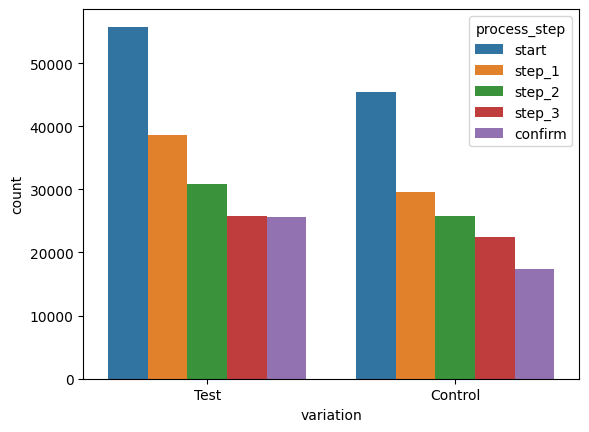

In [196]:
sns.countplot(data=df_final, x='variation', hue='process_step')

<Axes: xlabel='process_step', ylabel='variation'>

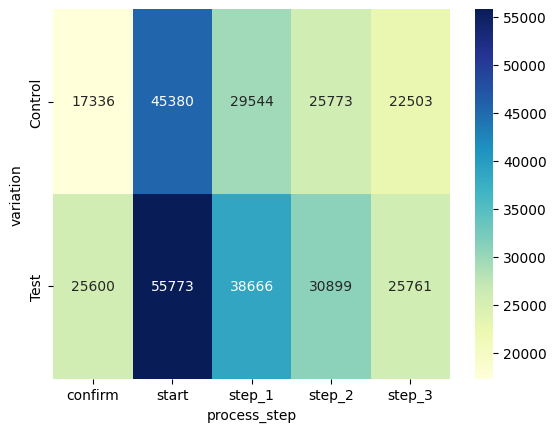

In [111]:
sns.heatmap(tabla, annot=True, cmap="YlGnBu", fmt="d")

Importamos la librería para trabajar con cramer y ver la relación de estas variables categóricas

In [125]:
from scipy.stats.contingency import association

calculamos el p-value que va entre 0 y 1 siendo 0 no hay relación y 1 hay relación

In [ ]:
association(tabla, method="cramer")

0.03746720499518621

El valor V de Cramér de 0,037 sugiere una asociación débil entre ambas variables. Si bien es estadísticamente significativa, la solidez de esta relación no es muy fuerte en la práctica

In [ ]:
tasa_finalización=

## Cargamos los datos de la lista de experimentos

In [50]:
df_experimentos = pd.read_csv('df_final_experiment_clients.txt') 

Observamos los datos:

In [ ]:
df_experimentos.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


### Analizamos los datos

In [ ]:
F.explorar_df(df_experimentos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  70609 non-null  int64 
 1   Variation  50500 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None
Primeras filas
   client_id Variation
0    9988021      Test
1    8320017      Test
2    4033851   Control
3    1982004      Test
4    9294070   Control
Describe()
             count unique   top   freq            mean             std    min  \
client_id  70609.0    NaN   NaN    NaN  5004991.876574  2877277.629755  169.0   
Variation    50500      2  Test  26968             NaN             NaN    NaN   

                 25%        50%        75%        max  
client_id  2519329.0  5016978.0  7483085.0  9999839.0  
Variation        NaN        NaN        NaN        NaN  
Nulos
Variation    20109
dtype: int64
Duplicados
0
Tamaño
Filas: 70609 | Columnas: 2


No tiene datos duplicados pero si nulos. Veamos los nulos:

In [ ]:
nulos_exp=F.ver_nulos(df_experimentos)


,client_id,Variation
50500,5459747,NaN
50501,8031000,NaN
50502,1847030,NaN
50503,9713157,NaN
50504,7775828,NaN
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [77]:
df_x= df_x.dropna()

In [78]:
df_x

,client_id,variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
50495,393005,Control
50496,2908510,Control
50497,7230446,Test
50498,5230357,Test


gente que participó en el experimento y quienes no

In [82]:
df_x['variation'].value_counts()

variation
Test       26968
Control    23532
Name: count, dtype: int64

In [ ]:
# 1. Convertir a datetime (si no lo están)
df['inicio'] = pd.to_datetime(df['inicio'])
df['fin'] = pd.to_datetime(df['fin'])

# 2. Aplicar la fórmula para obtener minutos totales
df['minutos_destinados'] = (df['fin'] - df['inicio']).dt.total_seconds() / 60